# Data Assessment & Analytics
Notes:
- change os directory location
- be aware of the number of provdied native source data files

In [1]:
# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd # the library that lets us read in shapefiles
import geoplot as gplt # for plotting maps
import geoplot.crs as gcrs #used to pull in webdata

# visulizaiton
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go # for subplot creation
from plotly.subplots import make_subplots # for subplot creation
import matplotlib.pyplot as mplt # use with gplt to save fig to pdf

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Set Working Directory
workingDir = "G:/Shared drives/WaDE Data/NorthDakota/AggregatedAmounts" # set working directory folder string here
os.chdir(workingDir)

In [3]:
# # This needs to be custom per state

# # Input Data
# #################################################################
# # Data 1: 2060report_data-release_v2110_A1_6_9_11_14_17_22
# df1 = pd.read_csv('RawinputData/2060report_data-release_v2110_A1_6_9_11_14_17_22.zip')

In [4]:
# Input Data - Processed WaDE Input files
#################################################################
dfws = pd.read_csv("ProcessedInputData/watersources.csv").replace(np.nan, "")
dfwspurge = pd.read_csv("ProcessedInputData/watersources_missing.csv").replace(np.nan, "")

dfru = pd.read_csv("ProcessedInputData/reportingunits.csv").replace(np.nan, "")
dfrupurge = pd.read_csv("ProcessedInputData/reportingunits_missing.csv").replace(np.nan, "")

dfag = pd.read_csv("ProcessedInputData/aggregatedamounts.csv").replace(np.nan, "")
dfagpurge = pd.read_csv("ProcessedInputData/aggregatedamounts_missing.csv").replace(np.nan, "")

# Water Source Info
- watersources.csv

In [5]:
print(len(dfws))
dfws.head(1)

1


,WaterSourceUUID,Geometry,GNISFeatureNameCV,WaterQualityIndicatorCV,WaterSourceName,WaterSourceNativeID,WaterSourceTypeCV
0,NDag_WSwadeID1,,,Fresh,WaDE Blank,wadeID1,Surface and Groundwater


<AxesSubplot: >

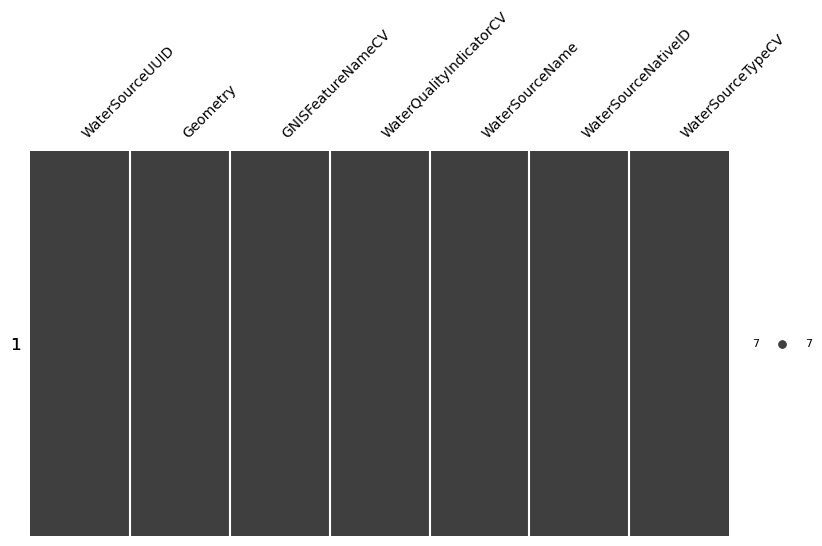

In [6]:
# Check what columns contain missing information.
msno.matrix(dfws, figsize=(10,5), fontsize=10)

In [7]:
# Unique values for 'WaterSourceTypeCV'
for x in dfws['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Surface and Groundwater",


In [8]:
# WaterSourceTypeCV: histogram distribution of WaDE values
print(dfws.WaterSourceTypeCV.value_counts())

fig = px.histogram(dfws, x="WaterSourceTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaterSourceTypeCV Entries in watersource.csv",
                  xaxis_title="WaterSourceTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
#fig.write_image('DataAssessment/figures/WaterSourceTypeCV.pdf', engine="kaleido")

Surface and Groundwater    1
Name: WaterSourceTypeCV, dtype: int64


# Reporting Unit Info
- reportingunits.csv

In [ ]:
print(len(dfru))
dfru.head(1)

<AxesSubplot: >

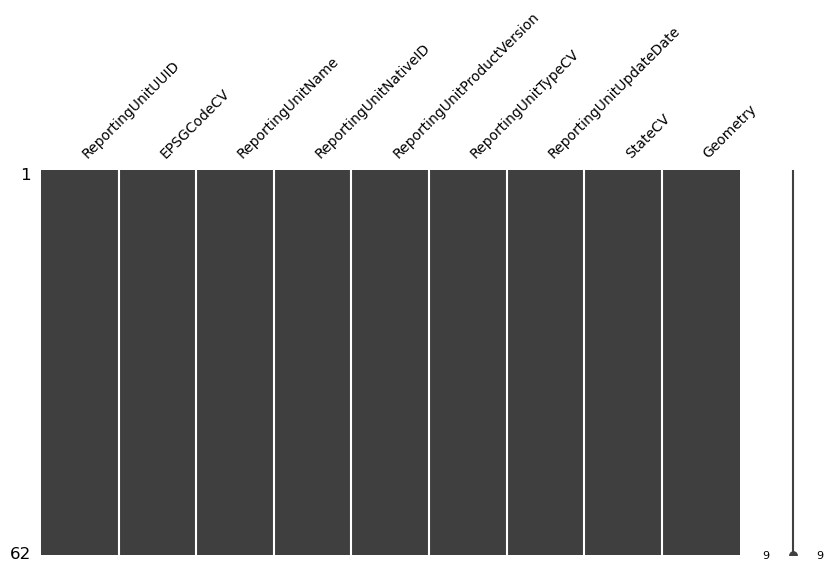

In [10]:
# Check what columns contain missing information.
msno.matrix(dfru, figsize=(10,5), fontsize=10)

In [11]:
# Unique values for 'ReportingUnitName'
for x in dfru['ReportingUnitName'].sort_values().unique():
    print(f'"' + x + '",')

"AppleCreek",
"Beaver",
"BigMuddy",
"BoisDeSioux",
"Boxelder",
"BrushLakeClosedBasin",
"Cedar",
"CharlielittleMuddy",
"Deep",
"DesLacs",
"DevilsLake",
"Elm",
"Elmmarsh",
"Forest",
"Goose",
"Grand",
"GrandMaraisred",
"HeadwatersSourisRiver",
"JamesHeadwaters",
"Knife",
"LakeSakakawea",
"LittleMuddy",
"LongCreek",
"LowerCannonball",
"LowerHeart",
"LowerLittleMissouri",
"LowerPembinaRiver",
"LowerSheyenne",
"LowerSouris",
"LowerYellowstone",
"Maple",
"MiddleLittleMissouri",
"MiddleRed",
"MiddleSheyenne",
"MooseMountainCreeksourisRiver",
"NorthForkGrand",
"PaintedWoodssquareButte",
"Park",
"Pipestem",
"Sandhillwilson",
"Turtle",
"UpperCannonball",
"UpperHeart",
"UpperJames",
"UpperLakeOahe",
"UpperLittleMissouri",
"UpperPembinaRiver",
"UpperRed",
"UpperSheyenne",
"WestMissouriCoteau",
"WesternWildRice",
"Willow",


In [12]:
# Unique values for 'ReportingUnitTypeCV'
for x in dfru['ReportingUnitTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"HUC8",


In [13]:
# ReportingUnitTypeCV: histogram distribution of WaDE values
print(dfru.ReportingUnitTypeCV.value_counts())

fig = px.histogram(dfru, x="ReportingUnitTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportingUnitTypeCV Entries in reportingunit.csv",
                  xaxis_title="ReportingUnitTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
#fig.write_image('DataAssessment/figures/ReportingUnitTypeCV.pdf', engine="kaleido")

HUC8    62
Name: ReportingUnitTypeCV, dtype: int64


In [14]:
# StateCV: histogram distribution of WaDE values
print(dfru.StateCV.value_counts())

fig = px.histogram(dfru, x="StateCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of StateCV Entries in reportingunit.csv",
                  xaxis_title="StateCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
#fig.write_image('DataAssessment/figures/StateCV.pdf', engine="kaleido")

ND    62
Name: StateCV, dtype: int64


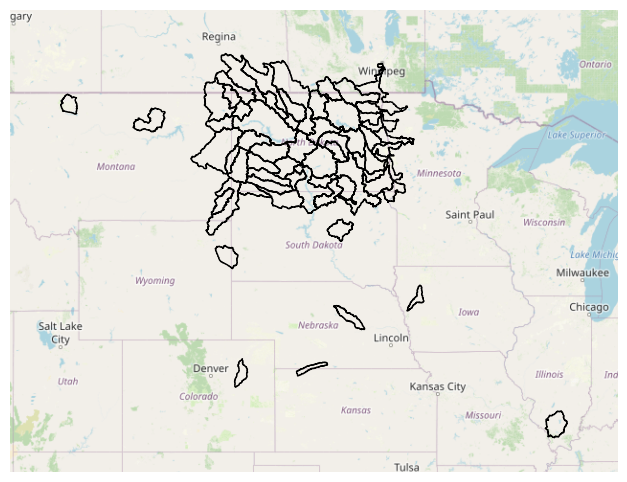

In [15]:
# Map poly info
try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    
    dfruPoly = dfru.copy()
    dfruPoly = dfruPoly[dfruPoly['Geometry'] != ""].reset_index(drop=True)
    dfruPoly['Geometry'] = gpd.GeoSeries.from_wkt(dfruPoly['Geometry'], crs="EPSG:4326")
    gdfruPoly = gpd.GeoDataFrame(dfruPoly, geometry=dfruPoly['Geometry'], crs="EPSG:4326") # covert to geodataframe
    gdfruPoly['Geometry'] = gdfruPoly.simplify(0.001) # simplify the geometry. Lower the number the larger the exported file.
    gplt.polyplot(gdfruPoly, ax=ax)
    mplt.savefig(format="pdf", fname='DataAssessment/figures/PolyMap.pdf')
except:
    print('No geometry data to plot')

In [16]:
dfruPoly.head()

,ReportingUnitUUID,EPSGCodeCV,ReportingUnitName,ReportingUnitNativeID,ReportingUnitProductVersion,ReportingUnitTypeCV,ReportingUnitUpdateDate,StateCV,Geometry,geometry
0,NDag_RUnd07140106,4326,BigMuddy,nd07140106,,HUC8,,ND,"POLYGON ((-88.89796 38.48671, -88.89430 38.486...","POLYGON ((-88.89796 38.48671, -88.89742 38.486..."
1,NDag_RUnd09010002,4326,DesLacs,nd09010002,,HUC8,,ND,"POLYGON ((-102.30623 49.04370, -102.30581 49.0...","POLYGON ((-102.30623 49.04370, -102.30622 49.0..."
2,NDag_RUnd09010003,4326,LowerSouris,nd09010003,,HUC8,,ND,"POLYGON ((-101.70382 49.96101, -101.68336 49.9...","POLYGON ((-101.70382 49.96101, -101.70327 49.9..."
3,NDag_RUnd09010004,4326,Willow,nd09010004,,HUC8,,ND,"POLYGON ((-100.13318 49.07945, -100.12830 49.0...","POLYGON ((-100.13318 49.07945, -100.13277 49.0..."
4,NDag_RUnd09010005,4326,Deep,nd09010005,,HUC8,,ND,"POLYGON ((-101.71301 49.12174, -101.71449 49.1...","POLYGON ((-101.71301 49.12174, -101.71313 49.1..."


# Aggregated Amounts Info
- aggregatedamounts.csv

In [17]:
print(len(dfag))
dfag.head(1)

8728


,MethodUUID,OrganizationUUID,ReportingUnitUUID,VariableSpecificUUID,WaterSourceUUID,AllocationCropDutyAmount,Amount,BeneficialUseCategory,CommunityWaterSupplySystem,CropTypeCV,CustomerTypeCV,DataPublicationDate,DataPublicationDOI,InterbasinTransferFromID,InterbasinTransferToID,IrrigatedAcreage,IrrigationMethodCV,PopulationServed,PowerGeneratedGWh,PowerType,PrimaryUseCategoryCV,ReportYearCV,SDWISIdentifierCV,TimeframeEnd,TimeframeStart,PrimaryUseCategory
0,NDag_M1,NDag_O1,NDag_RUnd10130103,NDwr_V1,NDag_WSwadeID1,,0.0,Domestic,,,,09/06/2023,,,,0.0,,,,,Domestic,1984,,1984-12-31,1984-01-01,


<AxesSubplot: >

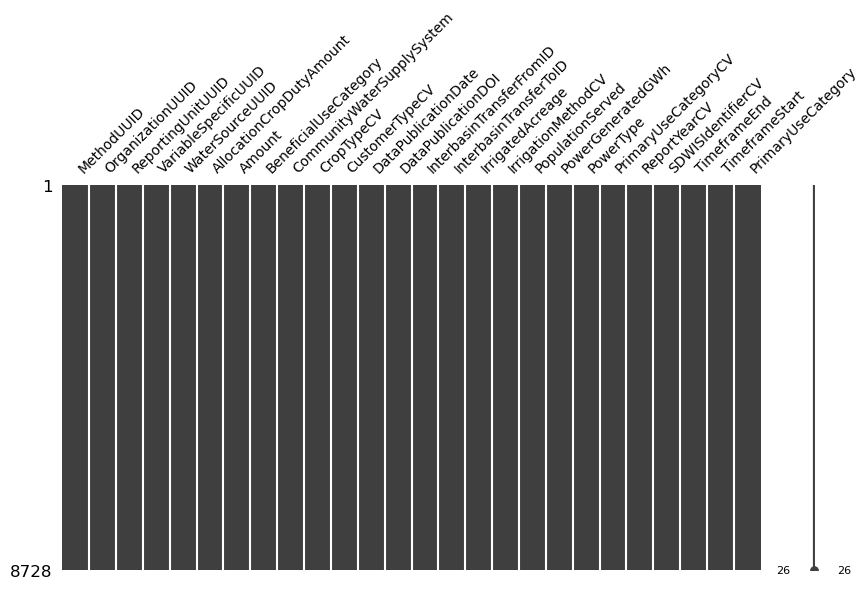

In [18]:
# Check what columns contain missing information.
msno.matrix(dfag, figsize=(10,5), fontsize=10)

In [19]:
# Unique values for 'AllocationCropDutyAmount'
for x in dfag['AllocationCropDutyAmount'].sort_values().unique():
    print(f'"' + str(x) + '",')

"",


In [20]:
# Unique values for 'CommunityWaterSupplySystem'
for x in dfag['CommunityWaterSupplySystem'].sort_values().unique():
    print(f'"' + x + '",')

"",


In [21]:
# Unique values for 'CropTypeCV'
for x in dfag['CropTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"",


In [22]:
# Unique values for 'CustomerTypeCV'
for x in dfag['CustomerTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"",


In [23]:
# Unique values for 'IrrigationMethodCV'
for x in dfag['IrrigationMethodCV'].sort_values().unique():
    print(f'"' + x + '",')

"",


In [24]:
# Unique values for 'PopulationServed'
for x in dfag['PopulationServed'].sort_values().unique():
    print(f'"' + x + '",')

"",


In [25]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfag['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Commercial',
 'Domestic',
 'Fish and Wildlife',
 'Flood Control',
 'Industrial',
 'Irrigation',
 'Multiple Use',
 'Municipal',
 'Power Generation',
 'Recreation',
 'Rural Water',
 'Stock']

In [ ]:
# Amount: Boxplot distribution of WaDE values
try:
    trace1 = go.Violin(x=dfag['Amount'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfag['Amount'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="Amount Distribution in aggregatedamounts.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="Amount Value", row=1, col=1)
    fig.update_xaxes(title_text="Amount Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show()
    #fig.write_image('DataAssessment/figures/Amount.pdf', engine="kaleido")

except: print('Could not plot Amount value.')

In [ ]:
# PrimaryUseCategory: histogram distribution of WaDE values
print(dfag.PrimaryUseCategory.value_counts())

fig = px.histogram(dfag, x="PrimaryUseCategory")
fig.update_layout(bargap=0.2,
                  title="Histogram of PrimaryUseCategory Entries in aggregatedamounts.csv",
                  xaxis_title="PrimaryUseCategoryCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
#fig.write_image('DataAssessment/figures/PrimaryUseCategory.pdf', engine="kaleido")

In [ ]:
# ReportYearCV: histogram distribution of WaDE values
print(dfag.ReportYearCV.value_counts())

fig = px.histogram(dfag, x="ReportYearCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of ReportYearCV Entries in aggregatedamounts.csv",
                  xaxis_title="ReportYearCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
#fig.write_image('DataAssessment/figures/ReportYearCV.pdf', engine="kaleido")

# Merge all figure pdfs into single output pdf

In [ ]:
# # merge all figure pdfs into single output pdf

# '''
# Notes:
# 'merger' is used for merging multiple files into one and merger.append(absfile) will append 
#  the files one by one until all pdfs are appended in the result file.
# '''

# from PyPDF2 import PdfFileMerger

# # If files are saved in the folder 'C:\Users' then Full_Path will be replaced with C:\Users
# filePath = str(os.getcwd()) + '/DataAssessment/figures'
# pdfsList = os.listdir(filePath)
# print(pdfsList)


# # os.listdir will create the list of all files in a directory
# merger = PdfFileMerger(strict=False)

# for file in pdfsList:
#     if file.endswith(".pdf"):
#         path_with_file = os.path.join(filePath, file)
#         print(path_with_file)
#         merger.append(path_with_file,  import_bookmarks=False )
# merger.write("DataAssessment/Figures Merged Copy.pdf")

# merger.close()

# Removed Records compared to Source Data
- this is working just fine
- just want to comment out temporarily

In [ ]:
# # Explode purge.xlsx files by WaDEUUID, concat together
# #################################################################

# # Explode watersources_missing.csv records by WaDEUUID
# dfwspurgeCopy = dfwspurge.assign(WaDEUUID=dfwspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfwspurgeCopy = dfwspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode reportingunits_missing.csv records by WaDEUUID
# dfrupurgeCopy = dfrupurge.assign(WaDEUUID=dfrupurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfrupurgeCopy = dfrupurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode aggregatedamounts_missing.csv records by WaDEUUID
# dfagpurgeCopy = dfagpurge.assign(WaDEUUID=dfagpurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfagpurgeCopy = dfagpurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # concat purge dataframes togehter
# frames = [dfwspurgeCopy, dfrupurgeCopy, dfagpurgeCopy] 
# dfWaDEUUID = pd.concat(frames)
# dfWaDEUUID = dfWaDEUUID.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
# print(len(dfWaDEUUID))
# dfWaDEUUID.head(1)

In [ ]:
# # this is custom to the provided data

# # attach purge dataframe to Native Source Data
# # df1: 2060report_data-release_v2110_A1_6_9_11_14_17_22
# #################################################################

# if 'ReasonRemoved' in df1:
#     df1 = df1.drop(['ReasonRemoved', 'IncompleteField'], axis=1)

# df1Copy = dfWaDEUUID.merge(df1, how='right', on='WaDEUUID')
# df1Copy = df1Copy.groupby('WaDEUUID').agg(lambda x: ','.join([str(elem) for elem in (list(set(x))) if elem!=''])).replace(np.nan, "").reset_index()
# df1Copy.to_csv('RawInputData/2060report_data-release_v2110_A1_6_9_11_14_17_22.zip', compression=dict(method='zip', archive_name='2060report_data-release_v2110_A1_6_9_11_14_17_22.csv'), index=False)

# Custom Queries and Analysis for this Dataset

In [ ]:
# asdf